----------

## <span style="color:green">Комментарий от наставника<span>

Привет! Спасибо, что сдал проект вовремя. Напомню, в комментариях я добавил два пункта.

### Что можно сделать лучше:

Пункты, которые ты можешь забрать в копилку знаний и применять в следующем проекте.   

### Что нужно доработать:

Пункты, которые нужно улучшить для того, чтобы я принял проект.

---------

----------

## <span style="color:green">Комментарий от наставника<span>

Хочу сразу тут написать общие моменты по работе, так как работа очень объемная.

Работа отличная и мне очень понравилась.

Есть небольшие недоработки, которые мешают ее принять сразу. Я отпишу их в самом низу. 

А так работа очень крутая!

---------

## <span style="color:blue">Спасибо! Я внизу ответил :)<span>

# Задание 1

In [82]:
import pandas as pd
import numpy as np
import matplotlib as plot
from pathlib import Path
path = Path.cwd()

In [83]:
re = pd.read_csv('{}/datasets/real_estate_data.csv'.format(path), sep='\t')
print(re.head())
print(re.info())

Unnamed: 0  total_images  last_price  total_area first_day_exposition  \
0           0            20  13000000.0       108.0  2019-03-07T00:00:00   
1           1             7   3350000.0        40.4  2018-12-04T00:00:00   
2           2            10   5196000.0        56.0  2015-08-20T00:00:00   
3           3             0  64900000.0       159.0  2015-07-24T00:00:00   
4           4             2  10000000.0       100.0  2018-06-19T00:00:00   

   rooms  ceiling_height  floors_total  living_area  floor  ... kitchen_area  \
0      3            2.70          16.0         51.0      8  ...         25.0   
1      1             NaN          11.0         18.6      1  ...         11.0   
2      2             NaN           5.0         34.3      4  ...          8.3   
3      3             NaN          14.0          NaN      9  ...          NaN   
4      2            3.03          14.0         32.0     13  ...         41.0   

   balcony    locality_name  airports_nearest  cityCenters_neares

### Первые наблюдения
* Данные разделены знаками табуляции, поэтому устанавливаем разделитель "\t"
* Название столбца cityCenters_nearest надо переименовать в city_centers_nearest. studio - в is_studio
* Всего объектов недвижимости 23699. В половине полей очень много пропусков, с каждым из них надо будет разобраться
* В поле building_series_id встречаются и числовые и текстовые значения 
* first_day_exposition преобразуем в дату



Посмотрим на building_series_id

In [84]:
# re.building_series_id.value_counts().head(20)

Похоже на какую-то помойку: данные в разных типах(текст, int, float), пропущенные значения. Оказалось что поля нет в описании к проекту, возможно выгрузили по ошибке. Надо уточнить у разработчиков что это за поле, пока оставим как есть

#### Проверим дубликаты

In [85]:
re.duplicated().sum()

0

Дубликатов нет
#### Посмотрим total_images 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13549c4d0>]],
      dtype=object)

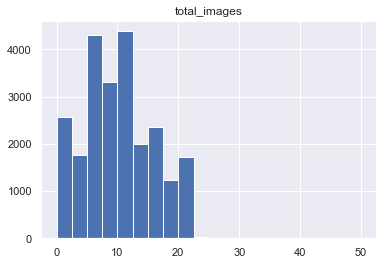

In [86]:
re.hist('total_images', bins=20)

In [87]:
print(re.total_images.value_counts().sort_index())

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64


Центральная часть гистограммы похожа на нормальное распределение, это хорошо. Есть всплески в начале и в конце, хвост справа обрезан(почти). Можно предположить что в ЯндексНедвижимости можно загружать максимум 20 изображений, из-за это и второй всплеск и хвост обрезан. Ниже я посмотрел все записи с количеством изображений больше 20(их 75), никаких закономерностей не выявлено. Видимо это баг системы. Т.к. таких значений не много, то  можно все значения больше 20 "округлить" до 20

In [88]:
re[re['total_images'] > 20].head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
99,99,32,9600000.0,90.0,2017-09-26T00:00:00,4,NaN,5.0,67.0,2,...,8.0,NaN,Санкт-Петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104.0
308,308,35,5700000.0,83.9,2018-02-01T00:00:00,3,2.6,5.0,51.8,2,...,9.6,NaN,Красное Село,27245.0,30670.0,0.0,NaN,0.0,NaN,47.0
1058,1058,39,1900000.0,63.0,2017-09-29T00:00:00,3,NaN,5.0,44.2,5,...,6.3,1.0,деревня Лопухинка,NaN,NaN,NaN,NaN,NaN,NaN,106.0
2003,2003,23,21000000.0,215.0,2017-11-11T00:00:00,4,NaN,5.0,55.0,2,...,17.0,NaN,Красное Село,24842.0,28266.0,1.0,311.0,1.0,1009.0,14.0
2537,2537,23,7500000.0,51.0,2017-11-09T00:00:00,2,NaN,7.0,30.0,3,...,8.8,NaN,Санкт-Петербург,16083.0,7287.0,0.0,NaN,0.0,NaN,14.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1354a3e50>]],
      dtype=object)

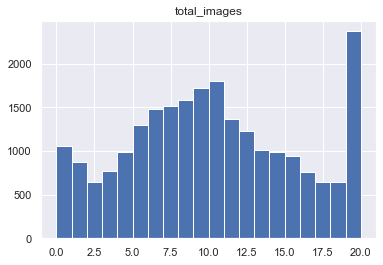

In [89]:
re['total_images'] = re.where(re['total_images'] < 21, 20)['total_images']
re.hist('total_images', bins=20)

Так уже лучше. Что делать с всплеском в начале пока не понятно, будем держать его в голове. Может так и должно быть

----------

## <span style="color:green">Комментарий от наставника<span>

Интересное наблюдение

---------

#### Смотрим last_price
Начнём с гистограммы

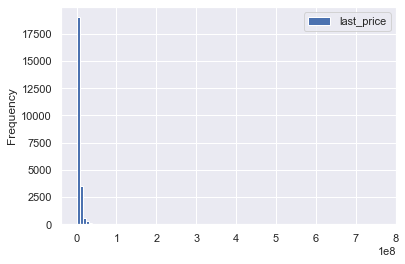

In [90]:
re.plot(kind='hist', y='last_price', bins = 100)

Вся гистограма сжалась из-за объектов дороже 100млн. График неинформативный, попробуем построить скаттер-плот, разделив по цвету объекты до 100лн и дороже 100млн. По оси Х разместим общую площадь объекта

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


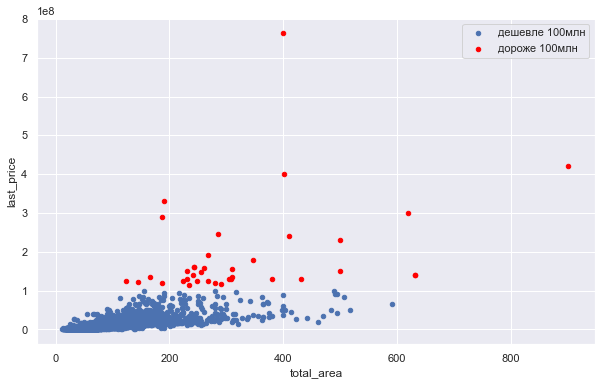

In [91]:
ax = re.query('last_price <= 100000000').plot(kind='scatter', x='total_area', y='last_price', label='дешевле 100млн', figsize=(10, 6))
re.query('last_price > 100000000').plot(kind='scatter', x='total_area', y='last_price', color='Red', ax = ax, label='дороже 100млн', grid=True)

Сейчас стали хорошо видны выбросы. Нестандартными можно считать площадь больше 390 и цену больше 100млн. Отбросим их и посмотрим гистограмму

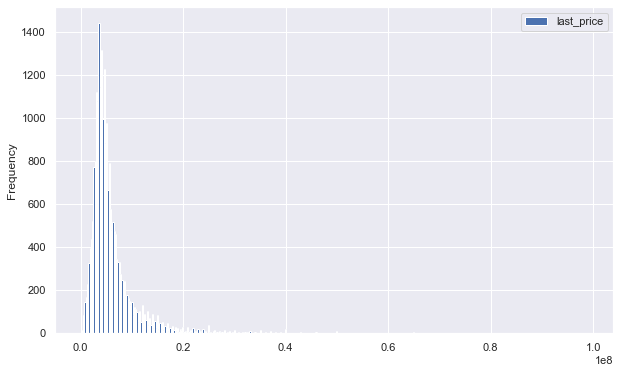

In [92]:
re = re.query('last_price <= 100000000 and total_area<390')
re.plot(kind='hist', y='last_price', bins = 400, figsize=(10, 6))


----------

## <span style="color:green">Комментарий от наставника<span>

Отличный ход со скаттер плот.

Хорошо, что отрисовываешь графики до и после манипуляций. Так всё очень наглядно

---------

Так уже лучше. Хорошо просматривается Пуассоновское распределение
#### Посмотрим total_area

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135df1650>]],
      dtype=object)

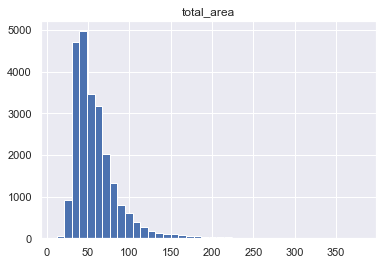

In [93]:
re.hist('total_area', bins=40)

На предудыдущем шаге мы уже откинули выбросы по общей площади. Сейчас здесь всё ок
#### Преобразуем first_day_exposition в дату


In [94]:
print(re.first_day_exposition.head())
re['first_day_exposition'] = pd.to_datetime(re.first_day_exposition, format='%Y-%m-%dT00:00:00')
print(re.first_day_exposition.head())

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object
0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


#### Смотрим rooms

In [95]:
re.rooms.value_counts().sort_index()

0      197
1     8046
2     7939
3     5810
4     1169
5      311
6       98
7       49
8       10
9        6
10       3
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64

Посмотрим что за объекты с 0 комнат

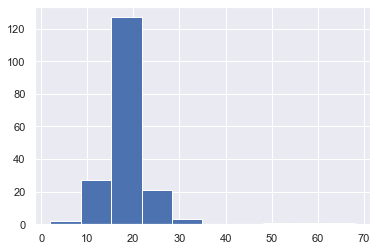

In [96]:
re.query('rooms == 0').living_area.hist()

В основном это квартиры небольшой площади, это квартиры-студии
#### Посмотрим ceiling_height

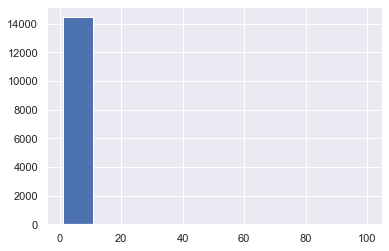

In [97]:
re.ceiling_height.hist()

Посмотрим на выбросы

In [98]:
re.query('ceiling_height > 5').ceiling_height.value_counts().sort_index()

5.2      1
5.3      1
5.5      1
5.8      1
8.0      3
8.3      1
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

Предположим, что нормальная высота потолков от 2 до 5 метров. От 20 до 50 метров - это реальные значения помноженные на 10. Остальные значения - ошибки, которые можно удалить. Напишем функцию обработки этого сценария

In [99]:
def preprocessing_height(height):
    if height<2:
        return np.nan
    elif height<5:
        return height
    elif height >=20 and height <50:
        return height/10
    else:
        return np.nan

re['ceiling_height'] = re['ceiling_height'].apply(preprocessing_height)

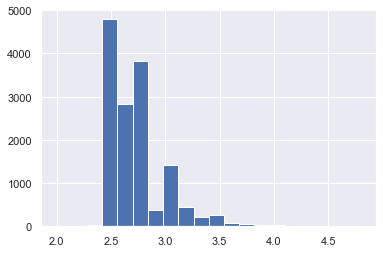

In [100]:
re.ceiling_height.hist(bins=20)

Распределение Пуассоновское, идём дальше.
#### floors_total


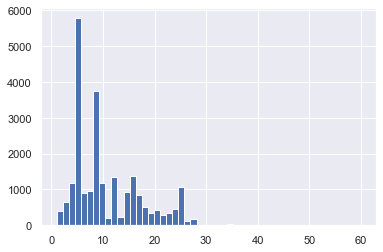

In [101]:
re['floors_total'].hist(bins=50)

Количество этажей - целое число, преобразуем столбец в int

In [102]:
try:
    re['floors_total'] = re.floors_total.astype(int)
except:
    count_missed_values = re.floors_total.isna().sum()
    print('не получилось. количество пропущенных значений:', count_missed_values)

не получилось. количество пропущенных значений: 86


Оставим как есть

Узнал что в pandas тип можно преобразовать с помощью выражения df['поле'] = df['поле'].astype(pd.Int32Dtype())

In [103]:
print(re.info())
re['floors_total'] = re['floors_total'].astype(pd.Int32Dtype())
print(re.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23644 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            23644 non-null  int64         
 1   total_images          23644 non-null  int64         
 2   last_price            23644 non-null  float64       
 3   total_area            23644 non-null  float64       
 4   first_day_exposition  23644 non-null  datetime64[ns]
 5   rooms                 23644 non-null  int64         
 6   ceiling_height        14450 non-null  float64       
 7   floors_total          23558 non-null  float64       
 8   living_area           21751 non-null  float64       
 9   floor                 23644 non-null  int64         
 10  is_apartment          2769 non-null   object        
 11  studio                23644 non-null  bool          
 12  open_plan             23644 non-null  bool          
 13  kitchen_area    

Было float64 стало int32
#### Преобразуем сразу типы для
* floor
* balcony
* parks_around3000
* ponds_around3000
* is_apartment

In [104]:
re['floor'] = re['floor'].astype(pd.Int32Dtype())
re['balcony'] = re['balcony'].astype(pd.Int32Dtype())
re['parks_around3000'] = re['parks_around3000'].astype(pd.Int32Dtype())
re['ponds_around3000'] = re['ponds_around3000'].astype(pd.Int32Dtype())
re['is_apartment'] = re['is_apartment'].astype(bool)
print(re.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23644 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            23644 non-null  int64         
 1   total_images          23644 non-null  int64         
 2   last_price            23644 non-null  float64       
 3   total_area            23644 non-null  float64       
 4   first_day_exposition  23644 non-null  datetime64[ns]
 5   rooms                 23644 non-null  int64         
 6   ceiling_height        14450 non-null  float64       
 7   floors_total          23558 non-null  Int32         
 8   living_area           21751 non-null  float64       
 9   floor                 23644 non-null  Int32         
 10  is_apartment          23644 non-null  bool          
 11  studio                23644 non-null  bool          
 12  open_plan             23644 non-null  bool          
 13  kitchen_area    

#### living_area

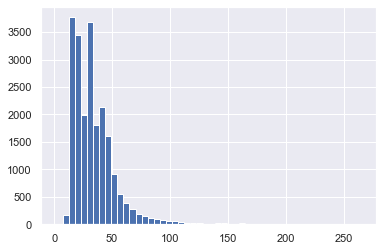

In [105]:
re['living_area'].hist(bins=50)

#### floor

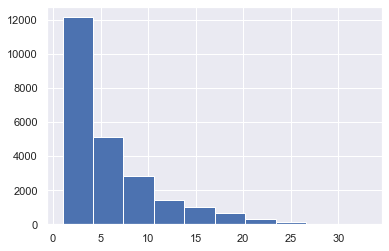

In [106]:
re['floor'].hist()

проверим есть ли случаи когда этаж квартиры больше чем этажей в доме


In [107]:
# re.query('floor > floors_total').floor.count()

хорошо что таких примеров нет

#### Посмотрим is_apartment

In [108]:
re.is_apartment.value_counts()

True     20924
False     2720
Name: is_apartment, dtype: int64

Меньше 3000 значений заполнено, и всего 49 апартаментов. Заполнять пропуски нет смысла

#### Смотрим studio
Вспоминаем что хотели переименовать поле в is_studio аналогично is_apartment

In [109]:
re.rename(columns={'studio': 'is_studio'}, inplace=True)
re.is_studio.value_counts()

False    23495
True       149
Name: is_studio, dtype: int64

#### Смотрим area

In [110]:
# re.area.hist(bins=20)

Пуассоновское распределение. идём дальше

#### open_plan пропускаем, он булевый и нет пропущенных значений. Смотрим kitchen_area


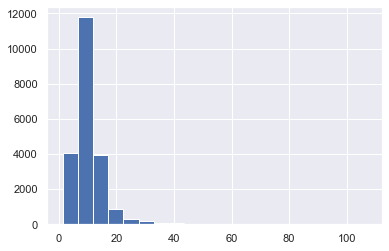

In [111]:
re.kitchen_area.hist(bins=20)

Есть странные большие значения, но их не много, пока оставим
#### Смотрим balcony

In [112]:
re.balcony.value_counts().sort_index()

0    3743
1    4190
2    3655
3      80
4     183
5     303
Name: balcony, dtype: Int64

Половина значений пропущена. Можно было бы преобразовать в int, но из-за пропущенных значений(типа float) не получается. 
#### Смотрим locality_name

In [113]:
re.locality_name.value_counts().head(15)

Санкт-Петербург            15666
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Name: locality_name, dtype: int64

Все данные есть, заполнены хорошо
#### Смотрим airports_nearest, cityCenters_nearest, parks_nearest

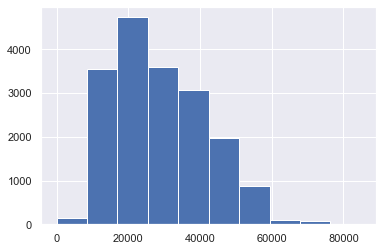

In [114]:
re.airports_nearest.hist()

In [115]:
re.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
re.city_centers_nearest.hist()

In [ ]:
re.parks_nearest.hist()

#### Смотрим parks_around3000, ponds_around3000

In [ ]:
re.parks_around3000.value_counts()

In [ ]:
re.ponds_around3000.value_counts()

## Закончили предобработку
## Добавим необходимые столбцы

цена квадратного метра

In [ ]:
re['meter_cost'] = re.last_price / re.total_area

день недели, месяц и год публикации объявления

In [ ]:
re['dow'] = re.first_day_exposition.dt.dayofweek
re['month'] = re.first_day_exposition.dt.month
re['year'] = re.first_day_exposition.dt.year
re.head()

этаж, на котором расположена квартира; варианты — первый, последний, другой;

In [ ]:
def floor_category(row):
    floor = row.floor
    floors_total = row.floors_total
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
re['floor_category'] = re.apply(floor_category, axis=1)
# re.floor_category.value_counts()

соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [ ]:
re['living_to_total_area'] = re.living_area / re.total_area
re['kitchen_to_total_area'] = re.kitchen_area / re.total_area

ax = re.living_to_total_area.plot(kind='hist', label='жилая к общей', legend=True)
re.kitchen_to_total_area.plot(kind='hist', ax = ax, label='кухня к общей', legend=True)

# Переходим к анализу

Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?

In [ ]:
re.describe()[['last_price', 'meter_cost', 'total_area', 'living_area', 'kitchen_area', 'living_to_total_area', 'kitchen_to_total_area', 'rooms',
              'parks_nearest', 'ponds_nearest', 'days_exposition', 'city_centers_nearest', 'airports_nearest']]
# [['total_images', 'last_price']]

Мы уже смотрели распределение по всем параметрам, оно пуассоновское, значит за типичные параметры продаваемых квартир можно взять медианы:
* Цена, млн: 4,62
* Цена р/м2: 95000
* Общая площадь, м2: 52
* Жилая площадь, м2: 30
* Площадь кухни, м2: 9,1
* Расстояние до ближайшего парка, м: 450
* Рассстояние до ближайшего водоёма, м: 500
* Расстояние до центра, км: 13,1
* Расстояние до аэропорта, км: 26,7
* Срок продажи, дней: 95

### Посмотрим какие параметры влияют на цену больше всего
Посмотрим корреляцию между параметрами объявлений

In [ ]:
re[['last_price', 'meter_cost', 'total_area', 'living_area', 'kitchen_area', 'rooms',
              'parks_nearest', 'ponds_nearest', 'city_centers_nearest', 'airports_nearest']].corr()

Цена сильнее всего зависит от трёх параметров:
* площадь(общая, жилая, кухни)
* кол-во комнат
* удалённость от центра

Удалённость от парков, водоёмов и аэропоров мало влияет на цену

По аэропортам можно посмотреть внимательнее. Аэропорты часто строят на большом удалении от городов, расстояние до них можно представить как сумму "расстояние по городу" + "расстояние от города до аэропорта". Попробуем вычислить "расстояние по городу" и посмотрим на корреляцию с ценой

In [ ]:
re.airports_nearest.plot(kind='hist', bins=100, figsize=(10, 5))

Приблизим

In [ ]:
re.query('airports_nearest < 20000').airports_nearest.plot(kind='hist', bins=100, figsize=(10, 5), grid=True)

Из графика видно, что "расстояние от города до аэропорта" составляет 6км. Добавим поле 'airports_nearest_filltered' на 6000 меньше чем 'airports_nearest'

In [ ]:
def airport_nearest_filter(dist):
    if dist<6000:
        return np.nan
    else:
        return dist-6000
    
re['airports_nearest_filltered'] = re.airports_nearest.apply(airport_nearest_filter)
re.airports_nearest_filltered.plot(kind='hist', bins=100, figsize=(10, 5))

In [ ]:
re[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms',
              'parks_nearest', 'ponds_nearest', 'city_centers_nearest', 'airports_nearest', 'airports_nearest_filltered']].corr()

Не сильно отличаются коэффициенты. Похоже что на корреляцию разница в константах не влияет

### Посмотрим на корреляцию между ценой и общей площадью

In [ ]:
re.plot(kind='scatter', x='total_area', y='last_price', figsize=(10, 5), alpha=0.1, )

In [ ]:
re.plot(kind='hexbin', x='total_area', y='last_price', figsize=(8, 4), bins=4, 
        sharex=False, grid=True )

Приблизим самый популярный участок

In [ ]:
re.query('20<total_area< 80 and last_price<12000000').plot(kind='hexbin', 
                                                        x='total_area', 
                                                        y='last_price', 
                                                        figsize=(10, 5), 
                                                        bins=4,
                                                        grid=True,
                                                        sharex=False)

Зависимость стоимости от общей площади логична и очевидна. Больше всего продаётся квартир площадью от 30 до 50 метров и ценой от 2 до 5млн.р

#### Посмотрим как зависит цена от кол-ва комнат
Для этого построим график с усами

In [ ]:
re[['last_price', 'rooms']].boxplot(by='rooms', figsize=(10, 4))

#for count_room in range(5):
#    re.query('rooms == @count_room').boxplot('last_price', subset='rooms')

Посмотрим частоту для количества комнат и оставим самые популярные

In [ ]:
re.rooms.value_counts()

In [ ]:
re.query('0<rooms<6')[['last_price', 'rooms']].boxplot(by='rooms', figsize=(10, 5))

Мы видим, что:
* чем больше комнат, тем дороже объект(выше медина стоимости)
* чем больше комнат, тем больше разброс стоимости(box больше по высоте)
#### Посмотрим как влияет цена квадратного метра от кол-ва комнат и сравним её с медианой по всем данным


In [ ]:
median_meter_cost = re.median()['meter_cost']
re.query('0<rooms<6')[['meter_cost', 'rooms']].boxplot(by='rooms', figsize=(10, 10))
plot.pyplot.axhline(y=median_meter_cost, color='r')

Мы видим, что:
* метр в однокомнатной квартире дороже чем в двушке
* в двушке дороже чем в трёшке
* для 4х и 5и-комнатных квартир увеличивается разброс стоимости метра(как вверх, так и вниз)
#### Построим тот же график для категории этажа

In [ ]:
re[['meter_cost', 'floor_category']].boxplot(by='floor_category', figsize=(10, 10))
plot.pyplot.axhline(y=median_meter_cost, color='r')

* Квартиры на первом этаже продаются с явным дисконтом
* На последнем этаже квартиры тоже дешевле, но не так сильно. Было бы интересно посмотреть как меняется цена метра на последнем этаже в зависимости от этажности дома

In [ ]:
import seaborn as sns
sns.set()
f, ax = plot.pyplot.subplots(figsize=(3,18))
sns.heatmap(
    re.query('floors_total<25').pivot_table(index='floors_total', 
                                              columns='floor_category', 
                                              values='meter_cost', 
                                              aggfunc='median').sort_index(ascending=False),
    cmap="PiYG",
    ax=ax
)
re.query('floors_total<28').pivot_table(index='floor_category', columns='floors_total', values='meter_cost')

Сгруппируем этажность дома и повторим

In [ ]:
def floors_total_cat(floors):
    if floors<6:
        return '1-5 этажей'
    elif floors<16:
        return '5-15 этажей'
    else:
        return 'больше 15 этажей'
    
re['floors_total_category'] = re['floors_total'].apply(floors_total_cat)

f, ax = plot.pyplot.subplots(figsize=(9,9))
sns.heatmap(
    re.pivot_table(index='floors_total_category', 
                  columns='floor_category', 
                  values='meter_cost', 
                  aggfunc='median').sort_index(ascending=False),
    cmap="PiYG",
    ax=ax,
    annot=True,
    linewidths=.5
    
)
    

* Сейчас можно утверждать, что первый этаж дешевле во всех домах. Разница в стоимости между 'первым' и 'другими' этажами увеличивается с 1 до 2млн(с 12% до 18%) по мере увеличения этажности
* Последний этаж существенно дешевле 'других' только в низкоэтажных домах. По мере увеличения этажности разница размывается, а в некоторых случаях последний этаж самый дорогой

#### Смотрим удалённость от центра

In [ ]:
re.plot(kind='scatter', x='city_centers_nearest', y='meter_cost', figsize=(10, 5), alpha=0.2)

Не понятно что происходит. Округлим расстояние до 10км и построим график на основе сводной таблицы

In [ ]:
re['city_centers_nearest_round'] = re['city_centers_nearest'] / 10000
re['city_centers_nearest_round'] = re['city_centers_nearest_round'].apply(np.ceil)
re.pivot_table(index='city_centers_nearest_round', values='meter_cost').reset_index().plot(kind='scatter', x='city_centers_nearest_round', y='meter_cost')

* Чем дальше от центра, тем дешевле м2
* В пределах 10км от центра самое дорогое жильё - 130000 за м2
* Цена падает вдвое на расстоянии 70км
* В диапазоне 50-70км цена м2 сильно не меняется

#### Посмотрим на даты подачи объявлений

In [ ]:
re.pivot_table(index='dow', values='meter_cost').plot(kind='bar', figsize=(10, 6))
re.pivot_table(index='month', values='meter_cost').plot(kind='bar', figsize=(10, 6), ylim=(90000, 100000))
re.pivot_table(index='year', values='meter_cost').plot(kind='bar', figsize=(10, 6))

* Зависимости от дня недели нет
* Зависимость от месяца слабая(от 97000 до 100000р/м2)
* С годами интереснее:
    * Пик цен пришёлся на докризисный 2014 год
    * За следующий(2015) год цены упали на 20% и продолжали падать в 2016 году
    * В 2016-18гг цены стабилизировались, а в 2019ом показали рост
    * Цены всё ещё не отросли до уровня 2014 года
    
## Пригороды

In [ ]:
re_locality = re.pivot_table(index='locality_name', values='meter_cost', aggfunc=['count', 'median'])
re_locality.columns=['count', 'meter_cost']
re_locality.sort_values(by='count', ascending=False).head(11)

* В Пушкине цена метра подозрительная
* Самые дешёвые метры в Выборге и Всеволжске
* Количество объявлений в пригородах сильно меньше чем в Санкт-Петербурге

#### Посмотрим на распределения разных параметров для Пушкина

In [ ]:
re_pushkin = re.query('locality_name == "Пушкин"')
re_pushkin.hist('total_area', bins=20)
re_pushkin.hist('meter_cost', bins=20)
re_pushkin.hist('total_images', bins=20)
re_pushkin.hist('rooms', bins=5)
re_pushkin.plot(kind='scatter', x='total_area', y='last_price', figsize=(10, 4) )

Все распределения похожи на те, что мы строили для всего датасета. Будем считать что данные корректны
## Сегментирование

Определим сегменты типичных квартир в центре и вне центра. "В центре" будем считать квартиры в радиусе 10км от центра.

In [ ]:
re_center = re.query('city_centers_nearest < 10000')
re_center[['total_area', 'rooms', 'city_centers_nearest']].describe()

Сократим сегмент первым и третьим перцентилями по каждому параметру

In [ ]:
re_center = re_center.query('50<=total_area<=100 and 2<=rooms<=3 and 4166<=city_centers_nearest<=8175')
re_center.shape[0]

Определим типичный сегмент 'вне центра'

In [ ]:
re_out_center = re.query('city_centers_nearest >= 10000')
re_out_center[['total_area', 'rooms', 'city_centers_nearest']].describe()

In [ ]:
re_out_center = re_out_center.query('45<=total_area<=60 and 1<=rooms<=3 and 13000<=city_centers_nearest<=17000')
re_out_center.shape[0]

Сравним корреляцию цены с основными факторами для всей выборки, центра и не_центра
#### вся выборка

In [ ]:
print(re[['last_price','total_area', 'rooms', 'city_centers_nearest']].corr())
pd.plotting.scatter_matrix(re[['last_price','total_area', 'rooms', 'city_centers_nearest']], figsize=(9, 9))

#### центр

In [ ]:
print(re_center[['last_price','total_area', 'rooms', 'city_centers_nearest']].corr())
pd.plotting.scatter_matrix(re_center[['last_price','total_area', 'rooms', 'city_centers_nearest']], figsize=(9, 9))

#### вне центра

In [ ]:
print(re_out_center[['last_price','total_area', 'rooms', 'city_centers_nearest']].corr())
pd.plotting.scatter_matrix(re_out_center[['last_price','total_area', 'rooms', 'city_centers_nearest']], figsize=(9, 9))

### Интересное наблюдение. 
Раньше об этом не задумывался: выбирая типичные сегменты мы размываем корреляцию по тем самым параметрам, по которым выбирали сегменты. Зависимость от кол-ва комнат и расстояния до центра полностю пропала. Особенно хорошо это видно по верхнему правому графику: для всего датасета видна зависимость цены от расстояния до центра, а на остальных графиках нет.
#### Корреляция с площадью осталась, но сильно ослабла.

## Посмотрим на апарты, студии и квартиры свободной планировки

In [ ]:
print(re.is_apartment.value_counts())
re_apartment = re.query('is_apartment == 1')

In [ ]:
print(re.is_studio.value_counts())
re_studio = re.query('is_studio == 1')

In [ ]:
print(re.open_plan.value_counts())
re_open_plan = re.query('open_plan == 1')

#### Очень мало объектов этих категорий. Сравнивать их со всеми остальными категориями было бы неправильно

----------

## <span style="color:green">Комментарий от наставника<span>

Еще раз скажу, что работа очень крутая!

Есть несколько небольших замечаний и предложений как её улучшить:

1. Автоматизация построения графиков. У тебя много достаточно однотипного кода по построению графиков, который можно автоматизировать использую `def`. Это пригодится в будущем, например ты сможешь сделать минибиблиотеку и подлкючать ее для работы с графиками. Попробуй использовать циклы и конструкции `if-elif-else`
1. Попробуй всё таки поработать с пропусками. Как их то их обработать и посмотреть на результат

Успехов!

---------

### Спасибо за такой комментарий, очень приятно! :)
Действительно много гистограмм в проекте, можно строить их за раз

In [ ]:
def df_graph(df):
    df = df.select_dtypes([np.int32, np.float64])
    # создаём палитру чтобы было не скучно :)
    palette = plot.pyplot.get_cmap('tab20b')
    num=0
    for (columnName, columnData) in df.iteritems():
        num+=1
        plot.pyplot.figure()
        df[columnName].plot(kind='hist', bins = 20, color=palette(num))
        plot.pyplot.xlabel(columnName)
df_graph(re)

#### Попробуем заполнить пропуски для city_centers_nearest
Составим справочник с расстояниями

In [ ]:
dist_to_spb = re.pivot_table(index='locality_name', values='city_centers_nearest').sort_values(by='city_centers_nearest').head()
dist_to_spb.head()

Оказывается city_centers_nearest это не расстояние от квартиры до центра города в котором находится квартира, а расстояние до центра Питера! Получается что зная city_centers_nearest, например, от посёлка Мурино до центра Питера, мы можем заполнить все пропущенные значения для Мурино.<br>
Посмотрим как записано locality_name для Мурино

In [ ]:
re.query('locality_name.fillna("").str.contains("Мурино")')['locality_name'].value_counts()

Удалим все обозначения населённых пунктов. Для этого сначала выведем слова, встречающиеся в locality_name 

In [ ]:
re.locality_name.str.split(expand=True).stack().value_counts()

Удалим из датасета "посёлок, деревня, поселок, типа, городского" и лишние пробелы. Проверим что осталось

In [ ]:
re['locality_name_short'] = re.locality_name.str.replace('поселок', '')
re['locality_name_short'] = re.locality_name_short.str.replace('посёлок', '')
re['locality_name_short'] = re.locality_name_short.str.replace('деревня', '')
re['locality_name_short'] = re.locality_name_short.str.replace('типа', '')
re['locality_name_short'] = re.locality_name_short.str.replace('городского', '')
re['locality_name_short'] = re.locality_name_short.str.strip()
re.locality_name_short.str.split(expand=True).stack().value_counts()

Типы населённых пунктов ушли, можно пересоздать справочник

In [ ]:
dist_to_spb = re.pivot_table(index='locality_name_short', values='city_centers_nearest').sort_values(by='city_centers_nearest').head()
dist_to_spb

Возможно есть ещё "опечатки" в названиях населённых пунктов....<br>
Добавим столбец city_centers_nearest2 со значениями из справочника

In [ ]:
re.set_index('locality_name_short', inplace=True)

In [ ]:
re['city_centers_nearest2'] = dist_to_spb['city_centers_nearest']
#re.query('city_centers_nearest.isnull() and city_centers_nearest2.notnull()').index.value_counts()
re['city_centers_nearest'].fillna(re['city_centers_nearest2'], inplace=True)

проверим для каких городов остались пропуски

In [ ]:
re[re['city_centers_nearest'].isnull()].index.value_counts().head()

Получилось заполнить таким образом данные по Мурино. В принципе можно в ЯндексКартах посмотреть расстояние от населённых пунктов до центра Питера и обновить справочник, и заполнить вообще все значения<br>
Расстояние до аэропорта можно заполнить таким же образом

----------

## <span style="color:red">Финальный комментарий от наставника<span>
    
Йей, поздравляю со сдачей проекта :) Проект получился подробным и понятным, графики подобраны верно, есть дельные выводы и комментарии в коде. Классная практика сравнивать датасеты до и после изменений, обнаруживаешь инсайты. 

---------